
# 1er Curso de Inteligencia Artificial aplicada a pesquerías API-INIDEP - 2023


Docentes

Gustavo Javier MESCHINO

Diego Sebastián COMAS

Matías YERRO


22/11/23

In [ ]:
# Convolutional Neural Networks (CNN)

In [1]:
#Bloque de imports:

import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

plt.rcParams['figure.figsize'] = [3, 3]

In [2]:
#Bloque de funciones:

# Cargar MNIST y dividir en train / test
def cargar_dataset():
	# Carga MNIST
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# Reestructurar a un solo canal
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# Clasificación de target en one-hot
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# Normalización de tonos de pixel
def prep_pixels(train, test):
	# Transformar integers en floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# Normalizar 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# Devolver normalizado
	return train_norm, test_norm

# Graficar un dígito
def graficar_uno(valor, conjunto, prediccion=None):
	fig = plt.figure
	plt.imshow(conjunto[valor], cmap='gray_r')
	if np.array_equiv(conjunto, trainX):
		plt.xlabel('Label train: {}'.format(np.argmax(trainY[valor])))
	if np.array_equiv(conjunto, testX):
		plt.xlabel('Label test: {}'.format(np.argmax(testY[valor])))
	if prediccion is not None:
		plt.ylabel('Predicho: '+str(prediccion))
	return plt.show()

<a id="4"></a>
## Convolutional Neural Network 
* CNN - Clasificación de imágenes, detección de objetos. 
* <a href="https://ibb.co/kV1j9p"><img src="https://preview.ibb.co/nRkBpp/gec2.jpg" alt="gec2" border="0"></a>

<a id="5"></a>
### Qué es una convolución?
* Tenemos una imagen y un detector de atributo(3*3 o alguna otra forma)
* Detector de atributo = kernel = filtro
* Detecta bordes o figuras convexas. Si es un perro, pueden ser la cola o las orejas, etc.
* feature map = conv(input image, feature detector). Multiplicación de matrices por elementos.
* feature map = convolved feature
* Stride = "Navegar" la imagen.
* Reducimos el tamaño de la imagen, perdemos algo de información (ganamos velocidad)
* Hacemos muchos mapas de atributos, porque tenemos muchos detectores de atributo.
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/m4FQC9/gec.jpg" alt="gec" border="0"></a>
* Luego de una convolución ponemos una relu, para romper linealidades. Las imágenes son no lineales.
* <a href="https://ibb.co/mVZih9"><img src="https://preview.ibb.co/gbcQvU/RELU.jpg" alt="RELU" border="0"></a>

<a id="6"></a>
### Same Padding (lo contrario de "valid")
* A medida que aplicamos capas convolucionales, el tamaño de las imágenes va a disminuir. Como queremos preservar la cantidad (de momento), aplicamos padding.
* Aquí, input y output son del mismo tamaño.
* <a href="https://ibb.co/jUPkUp"><img src="https://preview.ibb.co/noH5Up/padding.jpg" alt="padding" border="0"></a>

<a id="7"></a>
### Max Pooling
* Reduce el número de parámetros. Por ende, la carga computacional. Ademas, reduce también el overfitting.
* Ayuda a que los detectores de atributos se vuelvan invariantes a escalas u orientaciones.
* <a href="https://ibb.co/ckTjN9"><img src="https://preview.ibb.co/gsNYFU/maxpool.jpg" alt="maxpool" border="0"></a>

<a id="8"></a>
### Flattening
* <a href="https://imgbb.com/"><img src="https://image.ibb.co/c7eVvU/flattenigng.jpg" alt="flattenigng" border="0"></a>

<a id="9"></a>
### Full Connection
* Las que ya conocen.
* <a href="https://ibb.co/hsS14p"><img src="https://preview.ibb.co/evzsAU/fullyc.jpg" alt="fullyc" border="0"></a>

<a id="10"></a>
## Implementación en Keras

<a id="11"></a>
### Crear modelo
* conv => max pool => dropout => conv => max pool => dropout => fully connected (2 capas)
* Dropout: Desconectamos "cosas al azar" durante entrenamiento.
* <a href="https://ibb.co/jGcvVU"><img src="https://preview.ibb.co/e7yPPp/dropout.jpg" alt="dropout" border="0"></a>

In [14]:
# 
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

<a id="12"></a>
### Elegir el optimizador   
* Adam (ADAptive Moment estimation)

Es un SGD "acelerado". Combina los beneficios de otros dos optimizadores muy famosos: Adagrad y RMSprop. Básicamente, utiliza una tasa de aprendizaje diferente por cada parámetro, tomando en cuenta el primer y segundo momento de los gradientes.


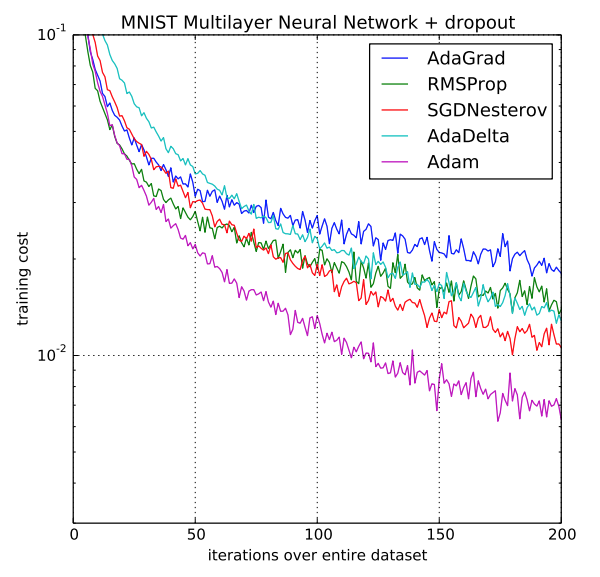

+info: https://optimization.cbe.cornell.edu/index.php?title=Adam

++info: https://optimization.cbe.cornell.edu/index.php?title=Main_Page


In [15]:
# Definir el optimizador
optimizer = Adam(learning_rate=0.001, 
                 beta_1=0.9, # The exponential decay rate for the 1st moment estimates
                 beta_2=0.999) # The exponential decay rate for the 2nd moment estimates.

<a id="13"></a>
### Compilar el Modelo
* Entropía cruzada categórica - Categorical crossentropy (multiclase)
* <a href="https://ibb.co/jm1bpp"><img src="https://preview.ibb.co/nN3ZaU/cce.jpg" alt="cce" border="0"></a>


In [16]:
# Compilar el modelo
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

<a id="14"></a>
### Épocas y tamaño de batch

In [17]:
epochs = 10  # Andará mejor con más épocas?
batch_size = 250

<a id="15"></a>
### Data Augmentation
* Para mitigar el overfitting, podemos agrandar nuestro dataset.
* Se hacen pequeñas alteraciones para agregar variedad.
* Imágenes rotadas, descentradas, diferente escala, etc.
* <a href="https://ibb.co/k24CUp"><img src="https://preview.ibb.co/nMxXUp/augment.jpg" alt="augment" border="0"></a>
    


In [18]:
trainX, trainY, testX, testY = cargar_dataset()
trainX, testX = prep_pixels(trainX, testX)

In [19]:
# Data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,        # set input mean to 0 over the dataset
        samplewise_center=False,         # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,   # divide each input by its std
        zca_whitening=False,             # dimension reduction
        rotation_range=5,                # randomly rotate images in the range 5 degrees
        zoom_range = 0.1,                # Randomly zoom image 10%
        width_shift_range=0.1,           # randomly shift images horizontally 10%
        height_shift_range=0.1,          # randomly shift images vertically 10%
        horizontal_flip=False,           # randomly flip images
        vertical_flip=False)             # randomly flip images

datagen.fit(trainX)

<a id="16"></a>
### Entrenar el modelo (+ data augmentation)

In [20]:
# Entrenando el modelo
history = model.fit(datagen.flow(trainX,trainY, batch_size=batch_size),
                              epochs = epochs, validation_data = (testX,testY), steps_per_epoch=trainX.shape[0] // batch_size)

Epoch 1/10
240/240 [==============================] - 36s 147ms/step - loss: 0.8156 - accuracy: 0.7300 - val_loss: 0.1274 - val_accuracy: 0.9647
Epoch 2/10
240/240 [==============================] - 36s 150ms/step - loss: 0.3345 - accuracy: 0.8941 - val_loss: 0.0833 - val_accuracy: 0.9738
Epoch 3/10
240/240 [==============================] - 38s 159ms/step - loss: 0.2527 - accuracy: 0.9215 - val_loss: 0.0704 - val_accuracy: 0.9771
Epoch 4/10
240/240 [==============================] - 32s 131ms/step - loss: 0.2176 - accuracy: 0.9324 - val_loss: 0.0574 - val_accuracy: 0.9817
Epoch 5/10
240/240 [==============================] - 31s 129ms/step - loss: 0.1992 - accuracy: 0.9385 - val_loss: 0.0534 - val_accuracy: 0.9834
Epoch 6/10
240/240 [==============================] - 31s 129ms/step - loss: 0.1799 - accuracy: 0.9453 - val_loss: 0.0450 - val_accuracy: 0.9849
Epoch 7/10
240/240 [==============================] - 42s 174ms/step - loss: 0.1677 - accuracy: 0.9490 - val_loss: 0.0460 - val_ac

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 7, 7, 16)         

<a id="17"></a>
### Evaluando el modelo
* Visualización del error de test
* Matriz de confusión


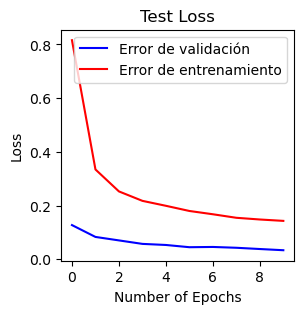

In [22]:
# Graficar el error de entrenamiento y de validación 
plt.plot(history.history['val_loss'], color='b', label="Error de validación")
plt.plot(history.history['loss'], color='r', label="Error de entrenamiento")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

313/313 [==============================] - 2s 7ms/step


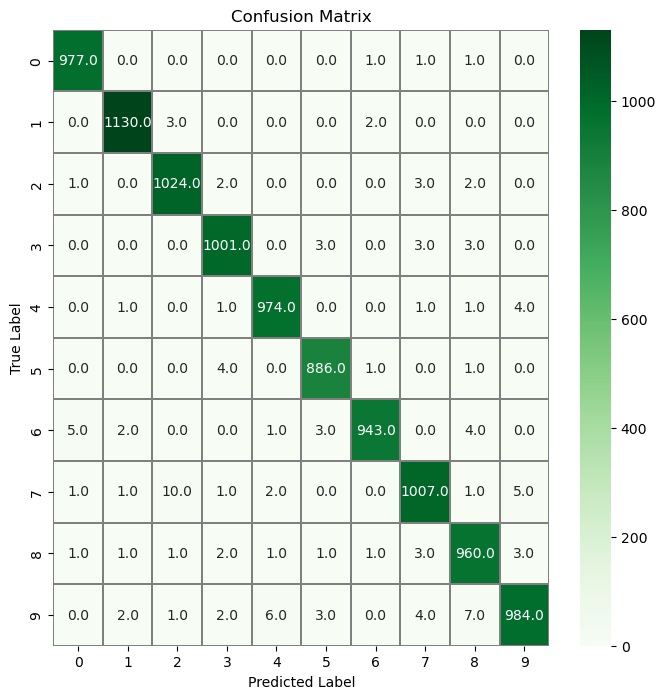

In [23]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(testX)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(testY,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()